# Age Estimation

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd /content/drive/MyDrive/CIS_5810_Project_9_Classification_Student_Template_V2

/content/drive/MyDrive/CIS_5810_Project_9_Classification_Student_Template_V2


In [8]:
import os
import numpy as np
import torch
from helperT import *

# Loading Data

PyTorch Datasets are objects that have a single job: to return a single datapoint on request. The exact form of the datapoint varies between tasks: it could be a single image, a slice of a time series, a tabular record or something else entirely. These are then passed on to a Dataloader which handles batching of datapoints and parallelism. 

We've written the dataloader function and transform function for you. `get_dataloaders()` will return three object: train_loader, val loader and test_loader.

```
Arguments:
    None
Return:
    train_loader      -- tensor,(y, x), [(32),(32, 2048)] 
    val_loader        -- tensor,(y, x), [(32),(32, 2048)] 
    test_loader       -- tensor,(y, x), [(32),(32, 2048)] 
```

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


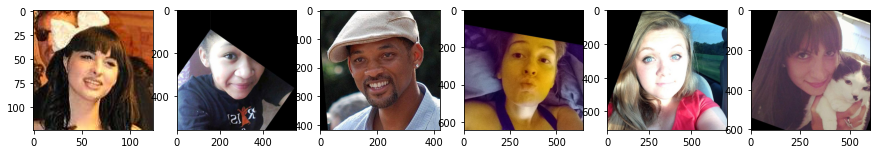

In [9]:
train_loader, val_loader, test_loader = get_dataloaders("DATASET/")
show_data('DATASET/')

# Define Linear Model
In this part, we will define our linear regression model here. First let's declare a class called `LinearClassifier` that inherit from `torch.nn.moudle`. Then you have to define the initialization in `__init__`, and define forward propogation in `forward` function.
Hint: You can use torch.nn.Linear.
```
Arguments:
    __init__        --(input_size, output_size)
Return:
    out      -- tensor, network calculation results 
```


In [10]:
class LinearClassifier(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearClassifier, self).__init__()
       
        self.linear_func = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        out = self.linear_func(x)
        return out

In [11]:
## Test ##
model = LinearClassifier(10, 2)
x = torch.zeros((5, 10))
y = model(x)
assert y.shape[0] == 5
assert y.shape[1] == 2
print('test passed')

test passed


## softmax + CELoss


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 0 	 mae: 6.323 	 loss: 3.784
Epoch: 1 	 mae: 5.650 	 loss: 3.545
Epoch: 2 	 mae: 5.505 	 loss: 3.433
Epoch: 3 	 mae: 5.403 	 loss: 3.367
Epoch: 4 	 mae: 5.301 	 loss: 3.323
Epoch: 5 	 mae: 5.307 	 loss: 3.292
Epoch: 6 	 mae: 5.293 	 loss: 3.270
Epoch: 7 	 mae: 5.269 	 loss: 3.253
Epoch: 8 	 mae: 5.231 	 loss: 3.241
Epoch: 9 	 mae: 5.197 	 loss: 3.232
Epoch: 10 	 mae: 5.189 	 loss: 3.224
Epoch: 11 	 mae: 5.150 	 loss: 3.218
Epoch: 12 	 mae: 5.150 	 loss: 3.214
Epoch: 13 	 mae: 5.134 	 loss: 3.210
Epoch: 14 	 mae: 5.122 	 loss: 3.207
Epoch: 15 	 mae: 5.123 	 loss: 3.205
Epoch: 16 	 mae: 5.117 	 loss: 3.203
Epoch: 17 	 mae: 5.116 	 loss: 3.202
Epoch: 18 	 mae: 5.115 	 loss: 3.201
Epoch: 19 	 mae: 5.115 	 loss: 3.200
Epoch: 20 	 mae: 5.109 	 loss: 3.199
Epoch: 21 	 mae: 5.107 	 loss: 3.199
Epoch: 22 	 mae: 5.091 	 loss: 3.199
Epoch: 23 	 mae: 5.092 	 loss: 3.199
Epoch: 24 	 mae: 5.096 	 loss: 3.199
Epoch: 25 	 mae: 5.101 	 loss: 3.200
Epoch: 26 	 mae: 5.101 	 loss: 3.200
Epoch: 27 	

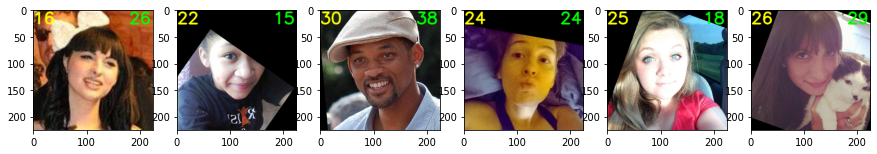

In [13]:
def train_softmax_cel():
    # TODO: Define model
    model = LinearClassifier(2048, 101).to('cuda')
    
    # TODO: Define SGD optimizer to update our weights and bias
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    # TODO: Define cross entropy loss criterion to calculate loss
    criterion = torch.nn.CrossEntropyLoss()

    for e in range(EPOCH):
        # Training model
        model.train()
        for i, (y, x) in enumerate(train_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            # calculate the gradient and update the model
            x, y = x.cuda().float(), y.cuda().long() 
            
            optimizer.zero_grad()
            O = model(x)
            loss = criterion(O, y)
            loss.backward()
            optimizer.step()


        # Validating model
        model.eval()
        gt = []
        preds = []
        C = 0
        for i, (y, x) in enumerate(val_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            # Calculate the validation outputs and validation loss in current epoch
            x, y = x.cuda().float(), y.cuda().long() 
            O = model(x)
            C = criterion(O, y)

            # Save the predictions for validation sets and ground truth
            preds.append(torch.argmax(O, dim=-1).cpu().detach().numpy())
            gt.append(y.cpu().numpy())

        # Change prediction and ground truth to numpy
        preds = np.concatenate(preds, axis=0)
        gt = np.concatenate(gt, axis=0)
        # Calculate difference and mae
        diff = preds - gt
        mae = np.abs(diff).mean()
        print(f"Epoch: {e} \t mae: {mae:.3f} \t loss: {C:.3f}")
    
    print("=> training finished")
    return model, preds, gt

model_softmax_cel, preds, gt = train_softmax_cel()
show_results(preds, gt)

## Test and Generate results file

In [14]:
prediction = test_cel(model_softmax_cel, test_loader, "softmax_cel.txt")
print("Test results has saved to softmax_cel.txt")
print(prediction[:10])

Test results has saved to softmax_cel.txt
[26.10899279 61.86679153 49.66358658 21.2774334  31.58608254 35.33199457
 45.2922019  40.7875835  22.16186935 58.33980587]


# Multi-layer classifier

In this part you will define your own multi-layer classifier. This model will make use of hidden state and non-linear activation functions, to give our model even more expressivity.

The architecture of this classifier is up to you, so feel free to experiment with various different architectures and see what performs best. The only requirement is that your model have **at least 2 layers**, and contain **at least one non-linearity**. For example, you could try using two fully connected layers (nn.Linear modules), with a ReLU activation in between. You are encouraged to explore the various modules within the `torch.nn` library.

Fill in the following module `MyClassifier`, to define the initialization and forward pass, as you did above.

In [19]:
class MyClassifier(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(MyClassifier, self).__init__()
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        self.L1 = torch.nn.Linear(inputSize, 1024)
        self.L2 = torch.nn.Linear(1024, 512)
        self.L3 = torch.nn.Linear(512, 256)
        self.L4 = torch.nn.Linear(256, outputSize)
        self.r1 = torch.nn.ReLU()
        self.r2 = torch.nn.ReLU()
        self.r3 = torch.nn.ReLU()

    def forward(self, x):
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        out = self.r1(self.L1(x))
        out = self.r2(self.L2(out))
        out = self.r3(self.L3(out))
        out = self.L4(out)
        
        return out

## Train multi-layer classifier

You may use whatever module you'd like for the criterion and optimizer. You are also welcome to tune the hyperparameters as desired or modify the training structure to get the optimal model.

Epoch: 0 	 mae: 11.312 	 loss: 4.572
Epoch: 1 	 mae: 11.312 	 loss: 4.469
Epoch: 2 	 mae: 11.429 	 loss: 4.037
Epoch: 3 	 mae: 10.849 	 loss: 3.819
Epoch: 4 	 mae: 9.477 	 loss: 3.717
Epoch: 5 	 mae: 7.579 	 loss: 3.624
Epoch: 6 	 mae: 6.395 	 loss: 3.508
Epoch: 7 	 mae: 5.695 	 loss: 3.412
Epoch: 8 	 mae: 5.427 	 loss: 3.342
Epoch: 9 	 mae: 5.407 	 loss: 3.297
Epoch: 10 	 mae: 5.257 	 loss: 3.268
Epoch: 11 	 mae: 5.232 	 loss: 3.242
Epoch: 12 	 mae: 5.220 	 loss: 3.220
Epoch: 13 	 mae: 5.215 	 loss: 3.203
Epoch: 14 	 mae: 5.206 	 loss: 3.190
Epoch: 15 	 mae: 5.193 	 loss: 3.180
Epoch: 16 	 mae: 5.198 	 loss: 3.174
Epoch: 17 	 mae: 5.189 	 loss: 3.169
Epoch: 18 	 mae: 5.168 	 loss: 3.165
Epoch: 19 	 mae: 5.152 	 loss: 3.162
Epoch: 20 	 mae: 5.151 	 loss: 3.162
Epoch: 21 	 mae: 5.149 	 loss: 3.162
Epoch: 22 	 mae: 5.140 	 loss: 3.162
Epoch: 23 	 mae: 5.136 	 loss: 3.164
Epoch: 24 	 mae: 5.137 	 loss: 3.165
Epoch: 25 	 mae: 5.129 	 loss: 3.166
Epoch: 26 	 mae: 5.122 	 loss: 3.167
Epoch: 

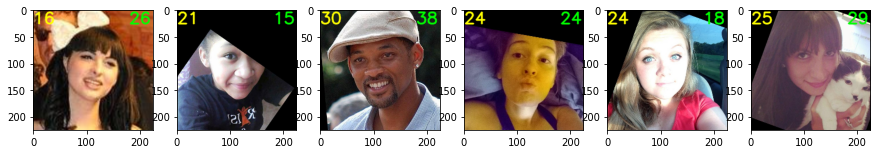

In [20]:
def train_my_classifier():
    # Define model
    model = MyClassifier(2048, 101).to('cuda')
    
    # Define an optimizer (from torch.optim)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    # Define a loss function
    criterion = torch.nn.CrossEntropyLoss()

    for e in range(50):
        # Training model
        model.train()
        for i, (y, x) in enumerate(train_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            x, y = x.cuda().float(), y.cuda().long()
            # calculate the gradient and update the model
            optimizer.zero_grad()
            O = model(x)
            loss = criterion(O, y)
            loss.backward()
            optimizer.step()


        # Validating model
        model.eval()
        gt = []
        preds = []
        current_loss = 0
        for i, (y, x) in enumerate(val_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            # Calculate the validation outputs and validation loss in current epoch
            x, y = x.cuda().float(), y.cuda().long() 
            O = model(x)
            C = criterion(O, y)

            # Save the predictions for validation sets and ground truth
            preds.append(torch.argmax(O, dim=-1).cpu().detach().numpy())
            gt.append(y.cpu().numpy())

        # Change prediction and ground truth to numpy
        preds = np.concatenate(preds, axis=0)
        gt = np.concatenate(gt, axis=0)
        # Calculate difference and mae
        diff = preds - gt
        mae = np.abs(diff).mean()
        print(f"Epoch: {e} \t mae: {mae:.3f} \t loss: {C:.3f}")
        
    print("=> training finished")
    return model, preds, gt

model_multilayer, preds, gt = train_my_classifier()
show_results(preds, gt)

## Test and generate results file

In [ ]:
prediction = test_cel(model_multilayer, test_loader, "results_multilayer.txt")
print("Test results has saved to results_multilayer.txt")
print(prediction[:10])

## Reflection

Finally, please briefly answer the reflection questions below.

- Describe your model's architecture, and any changes you made to the training process, if applicable. Be sure to describe any layers, their dimensions / number of channels, and activation functions; also include your choice of optimizer, loss function, and any hyperparameters you may have changed.
- How does your model perform, relative to your single-layer linear network?
- Were there any changes to the architecture you made to your classifier that made it perform worse?


I utilized 4 layers with hidden dimensions, each with 1024, 512, and 256 bits, and an activation function called ReLU after it. The same SGD optimizer and Cross-entropy loss function were employed, and the learning rate was set to 0.001.

The model's performance is substantially superior than that of the single-layer network because it converges much more quickly.


I made an attempt to alter the learning rate, but it performed worse.